# Importações

## Bibliotecas

In [82]:
import pandas as pd

import sklearn

import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder

import seaborn as sns

from sklearn.preprocessing import StandardScaler

## Dataset

In [83]:
adult = pd.read_csv("train_data.csv",sep=r'\s*,\s*',engine='python', na_values="?")

# Análise dos Dados

## Geral

**Vizualização de como são nossos dados**

In [84]:
adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [85]:
adult.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [86]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


**Análise da relação entre as features e os possíveis valores de label**

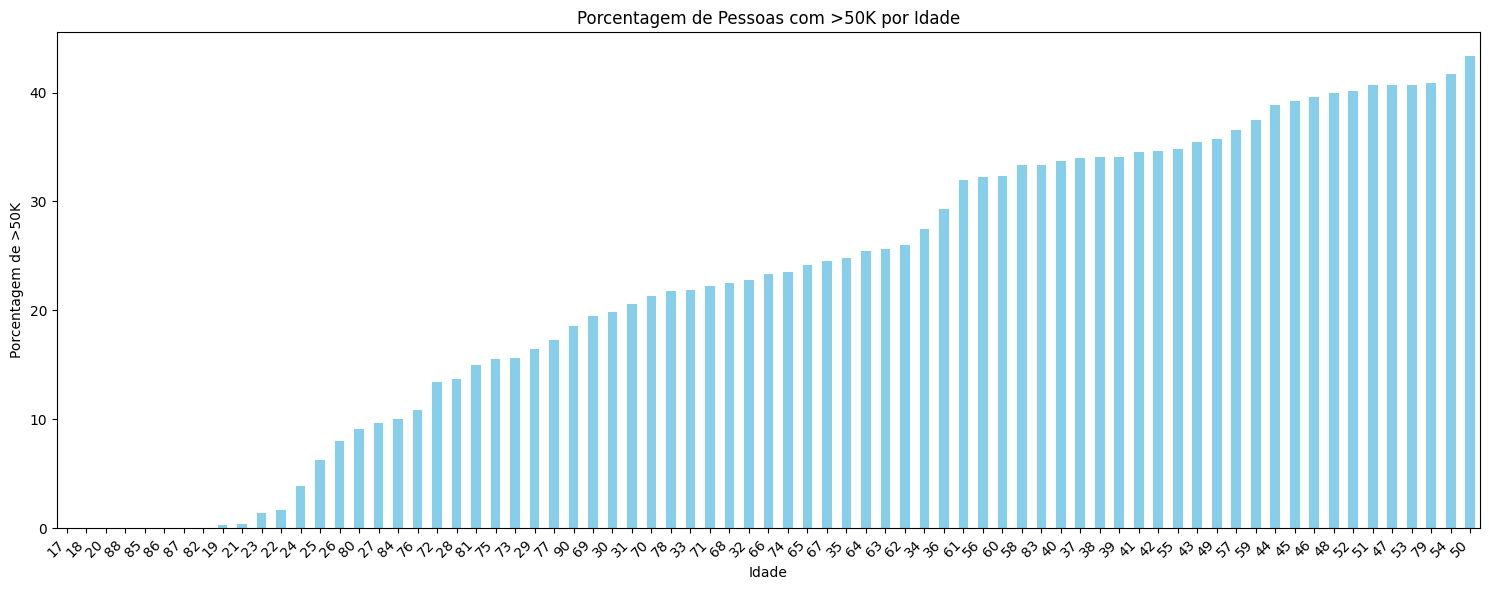

In [ ]:
# Verificação da relação entre a idade das pessoas e a quantidade de labels >50k

dados = adult.groupby('age')['income'].apply(lambda x: (x == '>50K').mean()) * 100



# Plotar o gráfico de barras

plt.figure(figsize=(15, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Idade')

plt.xlabel('Idade')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

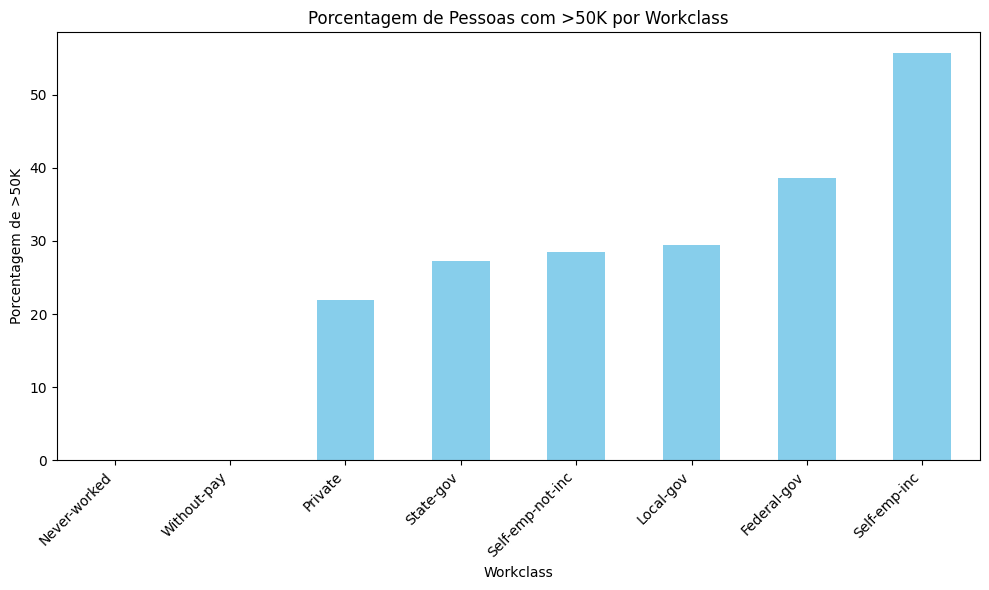

In [ ]:
# Verificação da relação entre a classe das pessoas e a quantidade de labels >50k

dados = adult.groupby('workclass')['income'].apply(lambda x: (x == '>50K').mean()) * 100



# Plotar o gráfico de barras

plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Workclass')

plt.xlabel('Workclass')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

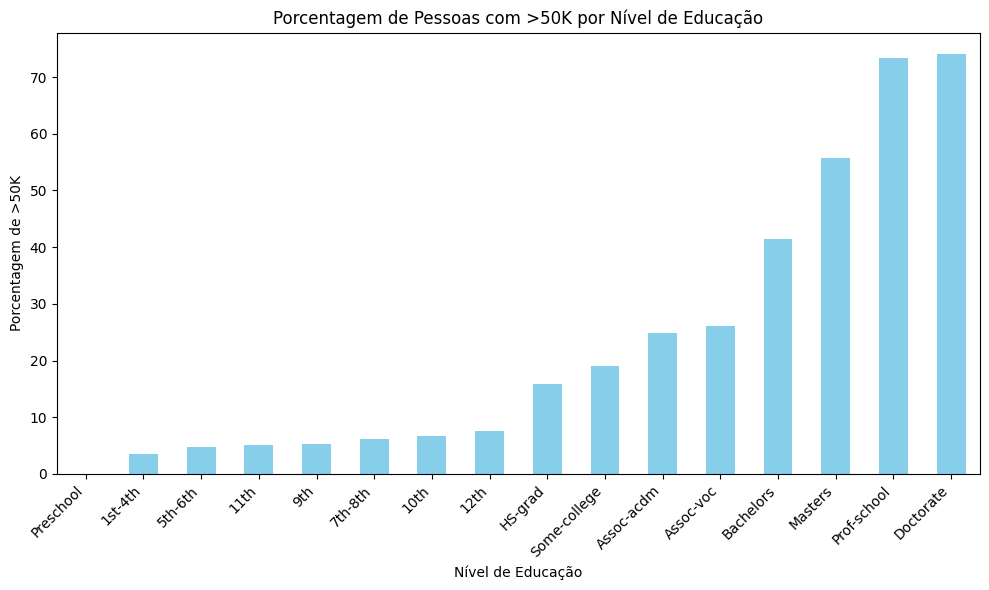

In [ ]:
# Verificação da relação entre o nível de educação das pessoas e a quantidade de labels >50k

dados = adult.groupby('education')['income'].apply(lambda x: (x == '>50K').mean()) * 100



# Plotar o gráfico de barras

plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Nível de Educação')

plt.xlabel('Nível de Educação')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

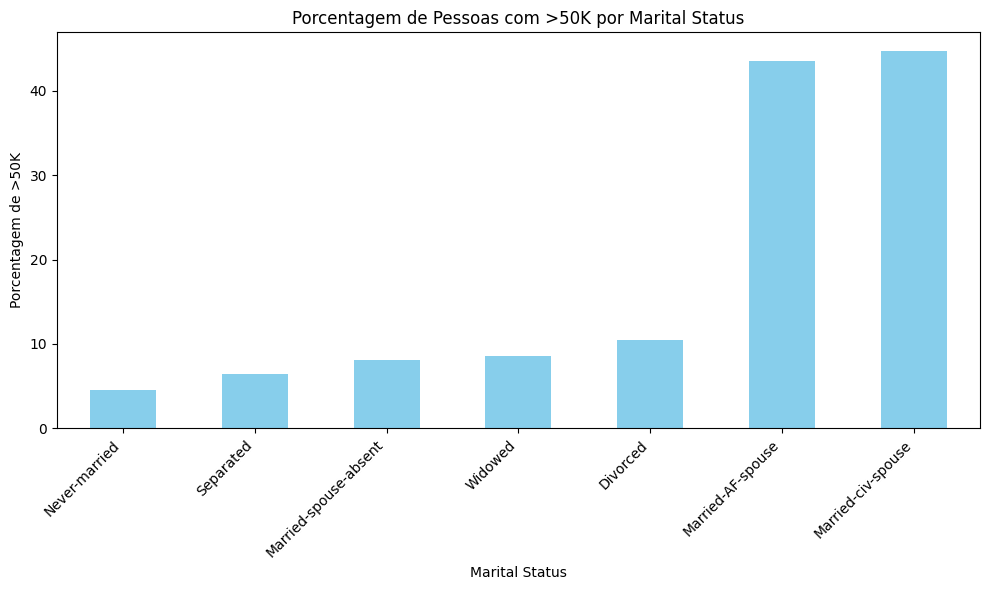

In [ ]:
# Verificação da relação entre o estado civil das pessoas e a quantidade de labels >50k

dados = adult.groupby('marital.status')['income'].apply(lambda x: (x == '>50K').mean()) * 100



plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Marital Status')

plt.xlabel('Marital Status')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

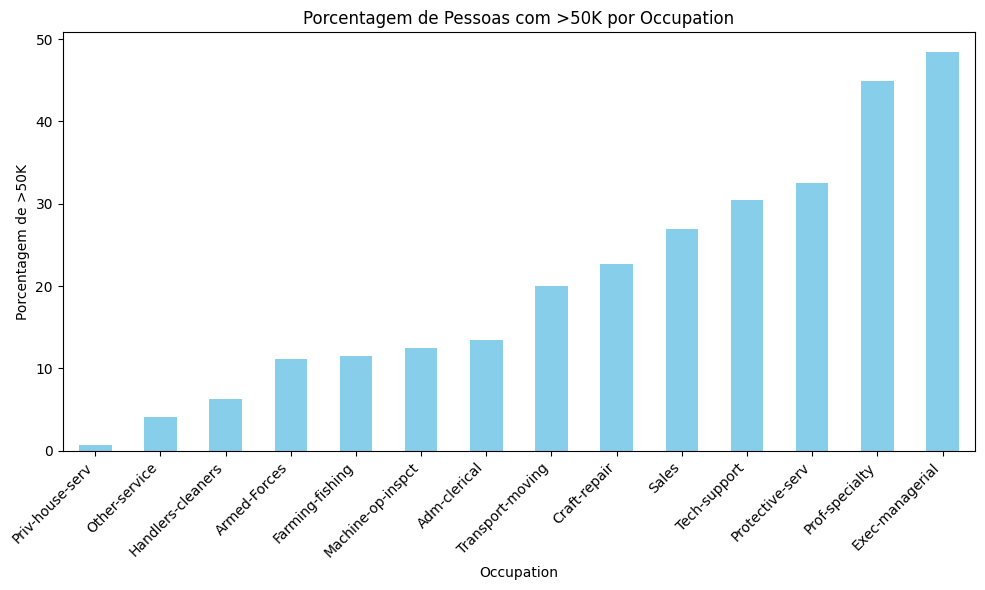

In [ ]:
# Verificação da relação entre a ocupação das pessoas e a quantidade de labels >50k

dados = adult.groupby('occupation')['income'].apply(lambda x: (x == '>50K').mean()) * 100



plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Occupation')

plt.xlabel('Occupation')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

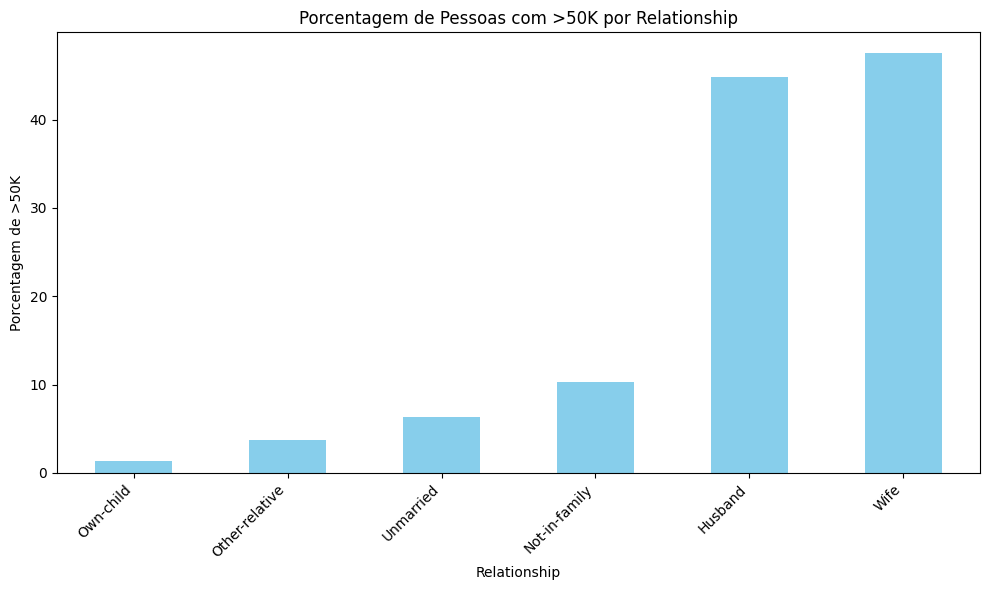

In [ ]:
# Verificação da relação entre o estado civil das pessoas e a quantidade de labels >50k

dados = adult.groupby('relationship')['income'].apply(lambda x: (x == '>50K').mean()) * 100



plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Relationship')

plt.xlabel('Relationship')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

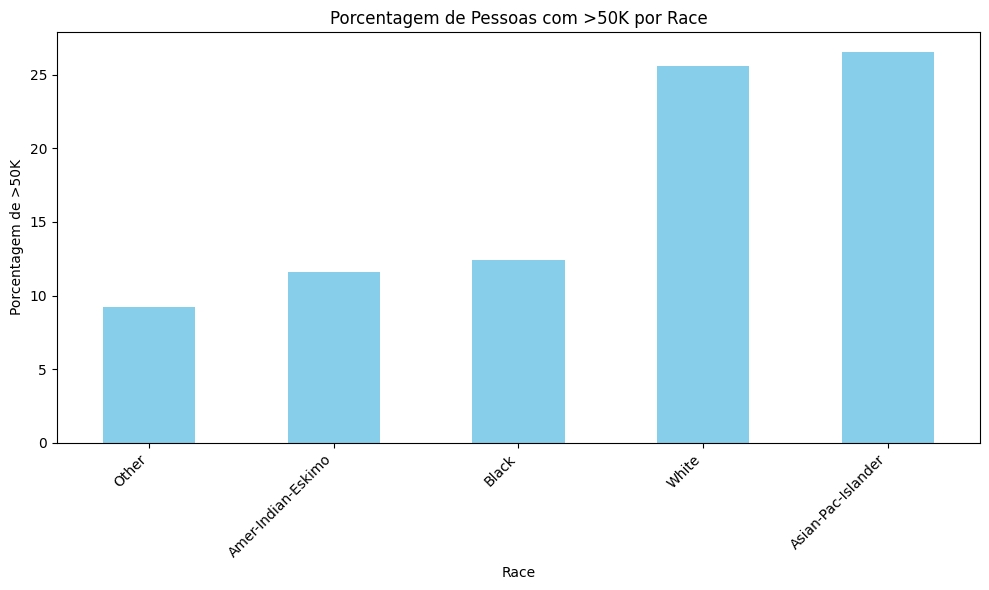

In [ ]:
# Verificação da relação entre a raça das pessoas e a quantidade de labels >50k

dados = adult.groupby('race')['income'].apply(lambda x: (x == '>50K').mean()) * 100



plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Race')

plt.xlabel('Race')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

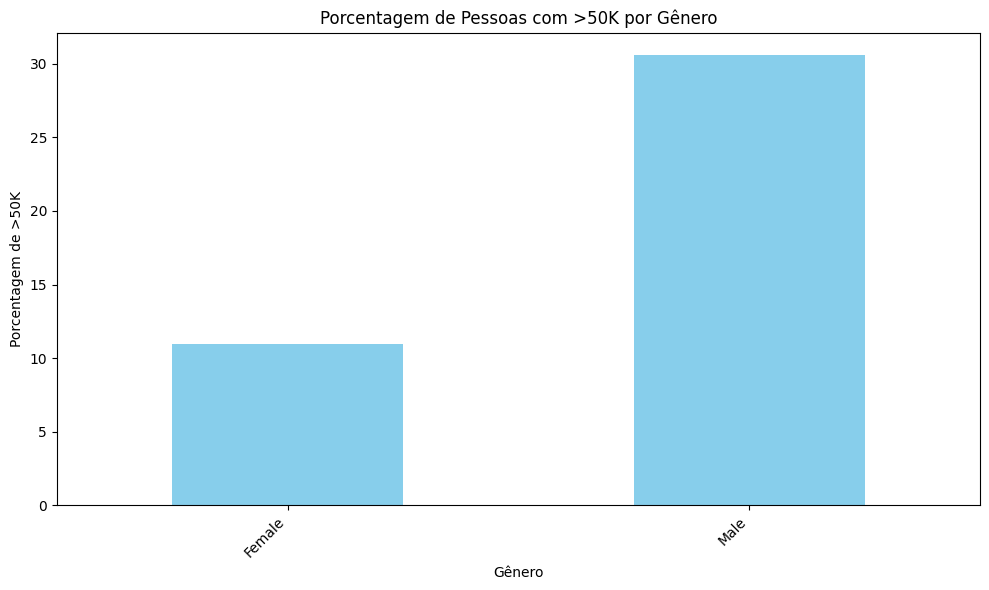

In [ ]:
# Verificação da relação entre o gênero das pessoas e a quantidade de labels >50k

dados = adult.groupby('sex')['income'].apply(lambda x: (x == '>50K').mean()) * 100



plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Gênero')

plt.xlabel('Gênero')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

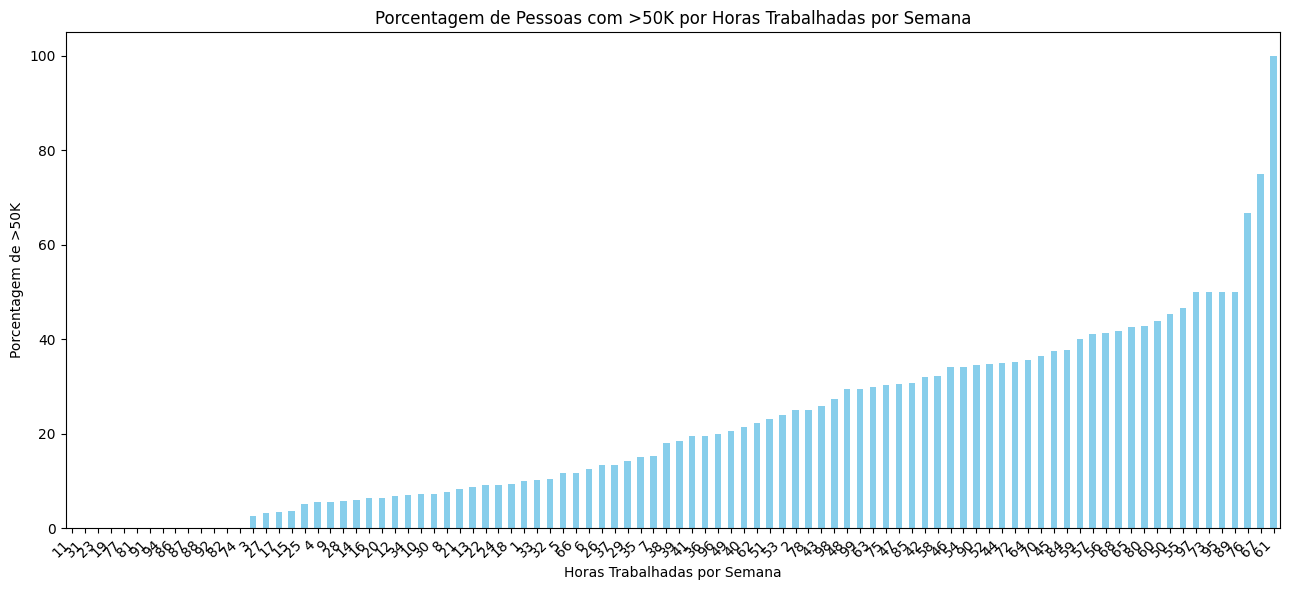

In [151]:
# Verificação da relação entre as horas de trabalho semanais das pessoas e a quantidade de labels >50k

dados = adult.groupby('hours.per.week')['income'].apply(lambda x: (x == '>50K').mean()) * 100



plt.figure(figsize=(13, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por Horas Trabalhadas por Semana')

plt.xlabel('Horas Trabalhadas por Semana')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

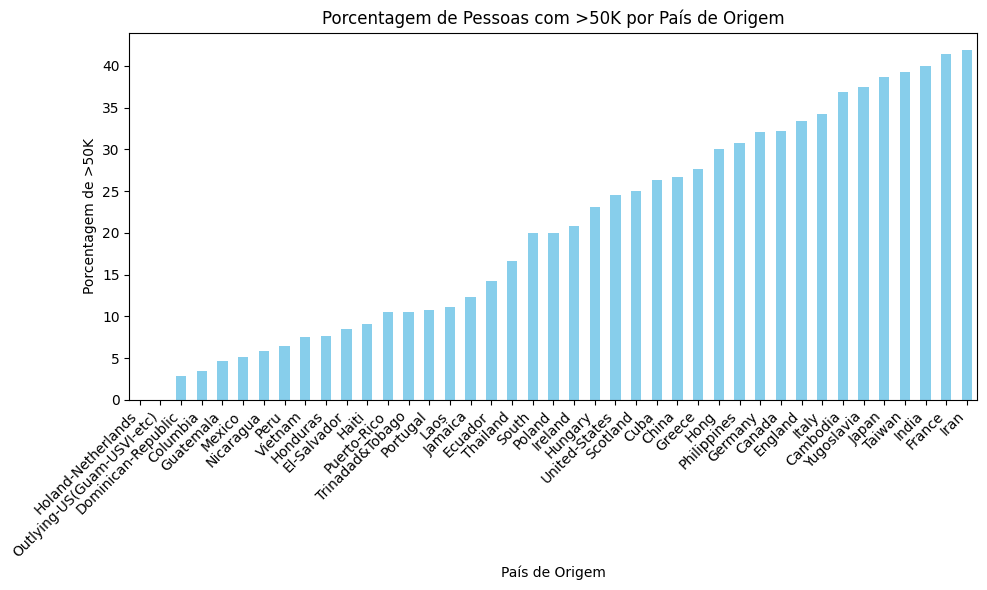

In [ ]:
# Verificação da relação entre o país de origem das pessoas e a quantidade de labels >50k

dados = adult.groupby('native.country')['income'].apply(lambda x: (x == '>50K').mean()) * 100



plt.figure(figsize=(10, 6))

dados.sort_values().plot(kind='bar', color='skyblue')

plt.title('Porcentagem de Pessoas com >50K por País de Origem')

plt.xlabel('País de Origem')

plt.ylabel('Porcentagem de >50K')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

**Análise das variáveis categóricas para futura codificação delas**

Nesta etapa será verificado a incidência de cada valor das variáveis categóricas, visando uma possível eliminação futura de valores que aparecem muito pouco

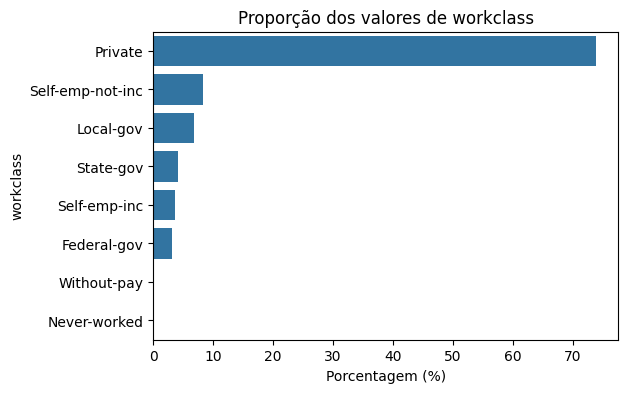

In [97]:
porcentagens = adult['workclass'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de workclass')

plt.xlabel('Porcentagem (%)')

plt.ylabel('workclass')

plt.show()

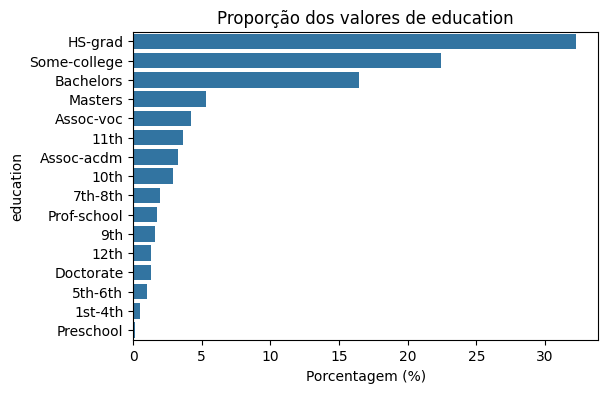

In [98]:
porcentagens = adult['education'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de education')

plt.xlabel('Porcentagem (%)')

plt.ylabel('education')

plt.show()

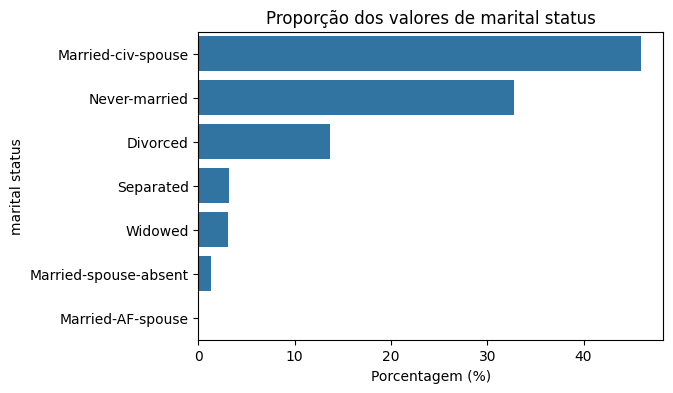

In [99]:
porcentagens = adult['marital.status'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de marital status')

plt.xlabel('Porcentagem (%)')

plt.ylabel('marital status')

plt.show()

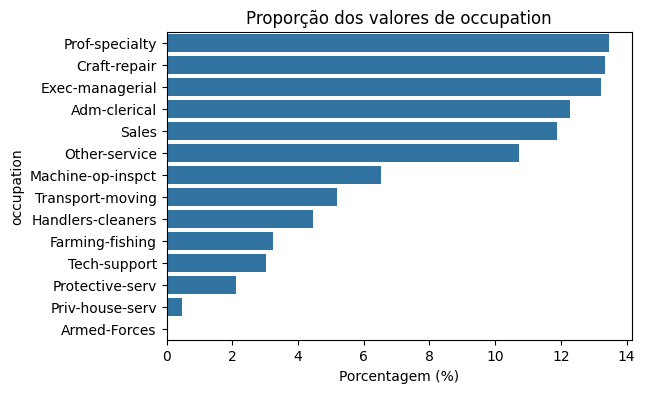

In [100]:
porcentagens = adult['occupation'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de occupation')

plt.xlabel('Porcentagem (%)')

plt.ylabel('occupation')

plt.show()

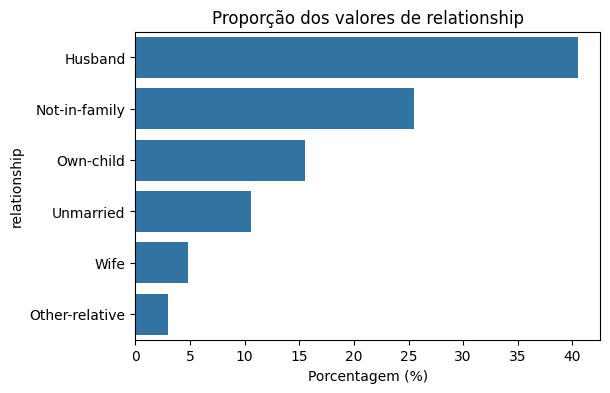

In [101]:
porcentagens = adult['relationship'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de relationship')

plt.xlabel('Porcentagem (%)')

plt.ylabel('relationship')

plt.show()

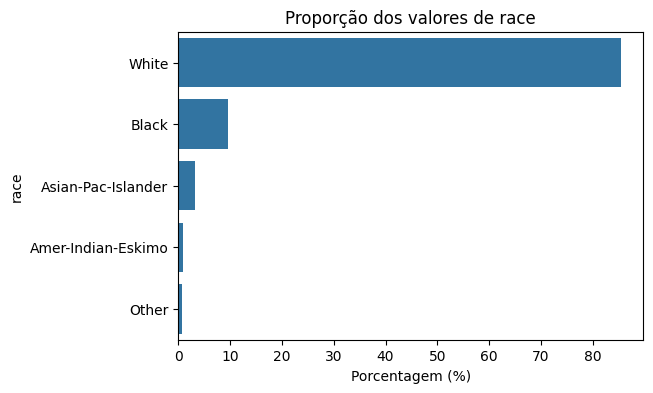

In [102]:
porcentagens = adult['race'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de race')

plt.xlabel('Porcentagem (%)')

plt.ylabel('race')

plt.show()

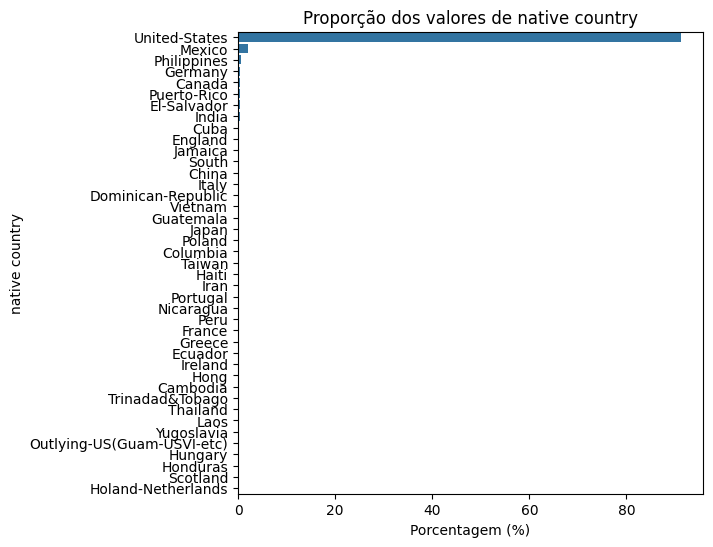

In [103]:
porcentagens = adult['native.country'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 6))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de native country')

plt.xlabel('Porcentagem (%)')

plt.ylabel('native country')

plt.show()

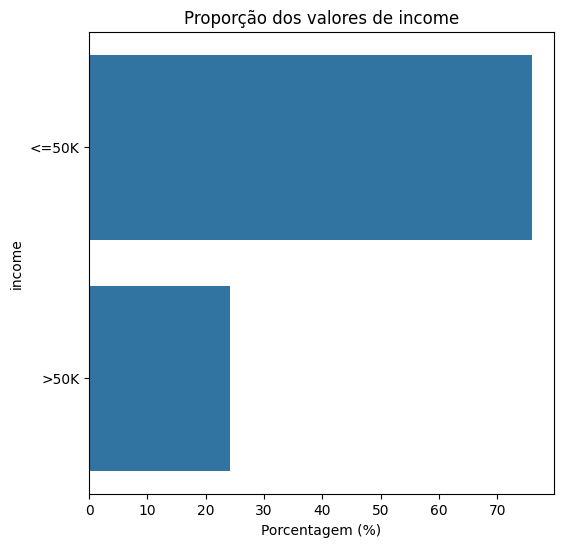

In [ ]:
# Verificando se há desbalanceamento dos dados trabalhados

porcentagens = adult['income'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 6))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de income')

plt.xlabel('Porcentagem (%)')

plt.ylabel('income')

plt.show()

In [105]:
porcentagens

income
<=50K    75.918305
>50K     24.081695
Name: proportion, dtype: float64

Analisando nossas features categóricas podemos ver uma péssima distribuição nas colunas "workclass", "race" e "native.country", além de um desbalanceamento da nossa label, possuindo muito mais dados de pessoas que recebem menos de 50k.

## Análise de dados faltantes

Analisaremos onde estão presentes os dados faltantes em nossa base para depois podermos modificá-la e diminuir ou até mesmo eliminar esses dados.

Número de linhas com pelo menos um valor faltante: 2399


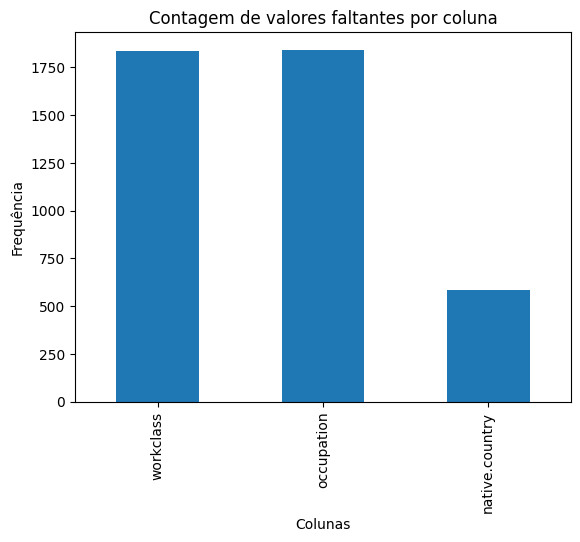

In [106]:
contagem_nan = adult.isnull().sum()



contagem_nan = contagem_nan[contagem_nan > 0]



linhas_com_nan = adult.isnull().any(axis=1).sum()



print(f'Número de linhas com pelo menos um valor faltante: {linhas_com_nan}')



contagem_nan.plot(kind='bar')

plt.title('Contagem de valores faltantes por coluna')

plt.xlabel('Colunas')

plt.ylabel('Frequência')

plt.show()

Com relação aos dados faltantes, podemos ver que eles estão presentes em apenas 3 labels, totalizando 2399 linhas.

# Transformação dos Dados

# Encoding

Para podermos trabalhar melhor com os dados, mapearemos temporariamente as variáveis categóricas para numéricas

Como analisado nos gráficos, as features "workclass", "race" e "native.country" são muito desbalanceadas, portanto iremos dividí-las em menos valores para mapear

In [ ]:

# Native Country será separada em apenas 2 valores (US, Outros), dado a dominância de pessoas presentes nos Estados Unidos quando comparado ao todo
adult['native.country'] = adult['native.country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')

# Workclass será separada em privado e outros, pelo mesmo motivo que o anterior.
adult['workclass'] = adult['workclass'].apply(lambda x: 'Private' if x == 'Private' else 'Other')

# Raça será separada entre branca e outros, também pelo mesmo motivo dos anteriores.
adult['race'] = adult['race'].apply(lambda x: 'White' if x == 'White' else 'Other')

Verificando nossas features após as alterações feitas

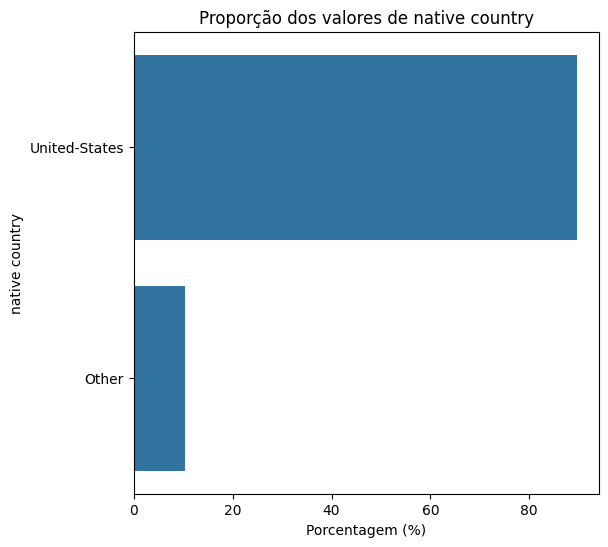

In [ ]:

porcentagens = adult['native.country'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 6))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de native country')

plt.xlabel('Porcentagem (%)')

plt.ylabel('native country')

plt.show()

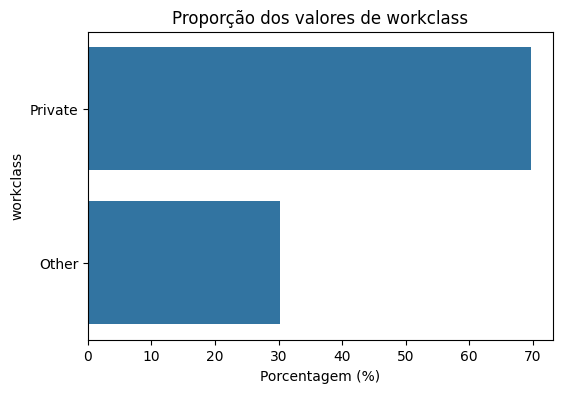

In [109]:
porcentagens = adult['workclass'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de workclass')

plt.xlabel('Porcentagem (%)')

plt.ylabel('workclass')

plt.show()

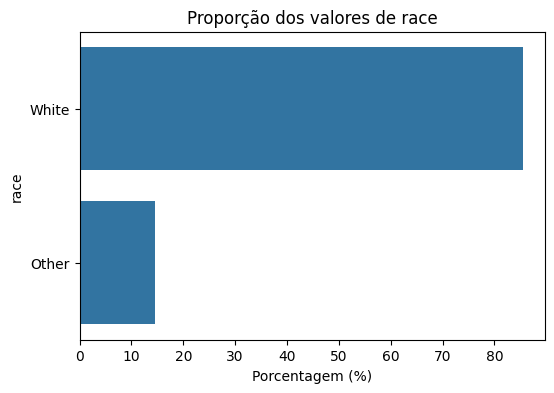

In [110]:
porcentagens = adult['race'].value_counts(normalize=True) * 100



plt.figure(figsize=(6, 4))

sns.barplot(y=porcentagens.index, x=porcentagens.values)

plt.title('Proporção dos valores de race')

plt.xlabel('Porcentagem (%)')

plt.ylabel('race')

plt.show()

## Correlação entre as colunas

Iremos medir a correlação entre as colunas dos nossos dados visando uma possível remoção futura de colunas redundantes ou que não contribuem muito para a análise do "income".

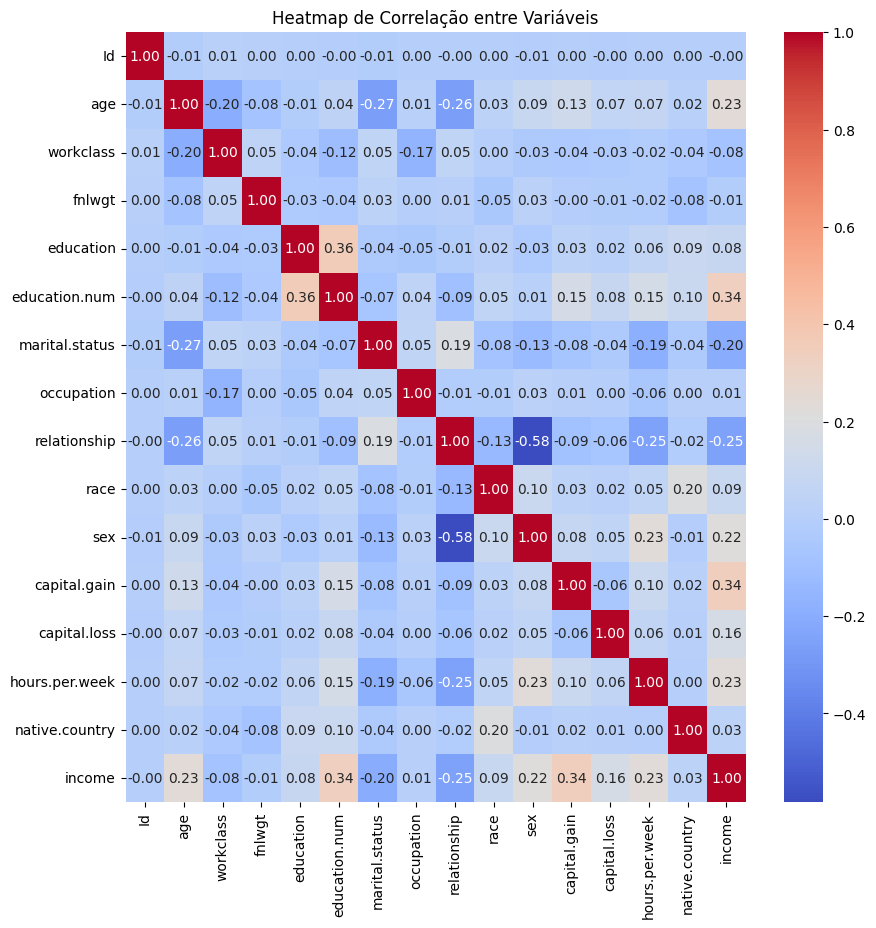

In [111]:
adult_num = adult.apply(preprocessing.LabelEncoder().fit_transform)



correlacao = adult_num.corr()



scaler = StandardScaler()

variaveis_numericas = adult_num.columns

adult_scaled = adult_num.copy()

adult_scaled[variaveis_numericas] = scaler.fit_transform(adult_num[variaveis_numericas])



plt.figure(figsize=(10, 10))

sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap de Correlação entre Variáveis')

plt.show()

Vendo nossas correlações, podemos ver que as features numéricas "Id", "fnlwgt" e "native.country" possuem baixos valores em relação ao "income", podendo talvez serem descartadas. Também podemos ver que as features "education" e "education.num", assim como "sex" e "relationship" possuem alta correlação, podendo ser considerado deixar apenas uma de cada dupla.

# Manipulação dos Dados

As decisões feitas foram:



- Retirar as linhas com valores faltantes ao invés das colunas;

- Remover as features com baixa Correlação com nossa Label;

- Remover feature ambígua (relationship);

- Manter o desbalanceamento de "income" nos dados de treino;

- Codificar algumas features para reduzir o número de valores;

- One-hot-Encoding nas features "Race" e "Occupation"




In [112]:
adult_train = pd.read_csv("train_data.csv",sep=r'\s*,\s*',engine='python', na_values="?")

adult_train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


**Retirando as linhas com valores faltantes e removendo colunas indesejadas**

In [113]:
adult_train = adult_train.dropna()

adult_train = adult_train.drop(['Id','fnlwgt' ,'education','relationship','native.country'], axis=1)



adult_train.head()

,age,workclass,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
0,34,Private,10,Divorced,Exec-managerial,White,Male,0,0,44,<=50K
1,58,Local-gov,6,Married-civ-spouse,Transport-moving,White,Male,0,0,40,<=50K
2,25,Private,10,Never-married,Machine-op-inspct,White,Male,0,0,42,<=50K
3,24,Private,10,Divorced,Adm-clerical,White,Female,0,0,40,<=50K
4,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,White,Male,5178,0,60,>50K


**Codificação das variáveis categóricas, sendo optado one-hot-encoding nas colunas "race" e "occupation"**

In [ ]:
# Codificação das variáveis de forma que possamos trabalhar com valores numéricos para nosso classificador

from sklearn.preprocessing import LabelEncoder



# WORKCLASS



nao_recebe = ['Never-worked','Without-pay']

adult_train['workclass'] = adult_train['workclass'].apply(lambda x: '0' if x in nao_recebe else '1')



# MARITAL STATUS



casado = ['Married-AF-spouse','Married-civ-spouse']

adult_train['marital.status'] = adult_train['marital.status'].apply(lambda x: '1' if x in casado else '0')



# Income e Sex



adult_train['income'] = adult_train['income'].apply(lambda x: '0' if x=='<=50K' else '1')

adult_train['sex'] = adult_train['sex'].apply(lambda x: '0' if x=='Female' else '1')



#ONE-HOT-ENCODING



adult_train_encoded = pd.get_dummies(adult_train, columns=['race','occupation'])





adult_train_encoded.head()

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,34,1,10,0,1,0,0,44,0,False,...,False,False,False,False,False,False,False,False,False,False
1,58,1,6,1,1,0,0,40,0,False,...,False,False,False,False,False,False,False,False,False,True
2,25,1,10,0,1,0,0,42,0,False,...,False,False,True,False,False,False,False,False,False,False
3,24,1,10,0,0,0,0,40,0,False,...,False,False,False,False,False,False,False,False,False,False
4,57,1,9,1,1,5178,0,60,1,False,...,False,False,False,False,False,False,False,False,False,True


In [115]:
colunas_numericas = ['age', 'capital.gain','capital.loss','education.num','hours.per.week']



adult_train_encoded = adult_train_encoded.apply(

    lambda col: preprocessing.LabelEncoder().fit_transform(col) if col.name not in colunas_numericas else col

)



adult_train_encoded.head()

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,34,1,10,0,1,0,0,44,0,0,...,0,0,0,0,0,0,0,0,0,0
1,58,1,6,1,1,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,1,10,0,1,0,0,42,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24,1,10,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57,1,9,1,1,5178,0,60,1,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
adult_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30161 entries, 0 to 32559
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           30161 non-null  int64
 1   workclass                     30161 non-null  int64
 2   education.num                 30161 non-null  int64
 3   marital.status                30161 non-null  int64
 4   sex                           30161 non-null  int64
 5   capital.gain                  30161 non-null  int64
 6   capital.loss                  30161 non-null  int64
 7   hours.per.week                30161 non-null  int64
 8   income                        30161 non-null  int64
 9   race_Amer-Indian-Eskimo       30161 non-null  int64
 10  race_Asian-Pac-Islander       30161 non-null  int64
 11  race_Black                    30161 non-null  int64
 12  race_Other                    30161 non-null  int64
 13  race_White                    30161 

# **Preparando os dados de teste**

In [ ]:
# Importação do arquivo de teste

adult_test = pd.read_csv("test_data.csv",sep=r'\s*,\s*',engine='python', na_values="?")

adult_test.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [ ]:
# Remoção das features desnessárias, dado nossa análise

id_list = adult_test['Id']

adult_test = adult_test.drop(['Id', 'fnlwgt', 'education','relationship','native.country'], axis=1)

In [ ]:
# Realização das mesmas mudanças feitas ao conjunto de treino (Codificação, normalização...)

adult_test['workclass'] = adult_test['workclass'].apply(lambda x: '0' if x in nao_recebe else '1')



adult_test['marital.status'] = adult_test['marital.status'].apply(lambda x: '1' if x in casado else '0')



adult_test['sex'] = adult_test['sex'].apply(lambda x: '0' if x=='Female' else '1')



adult_test_encoded = pd.get_dummies(adult_test, columns=['race','occupation'])



adult_test_encoded = adult_test_encoded.apply(

    lambda col: preprocessing.LabelEncoder().fit_transform(col) if col.name not in colunas_numericas else col

)



adult_test_encoded.head()

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,1,13,0,1,0,0,44,0,0,...,0,0,0,0,0,1,0,0,0,0
1,64,1,13,1,1,0,0,45,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,1,14,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,1,9,0,1,0,0,40,0,0,...,0,0,1,0,0,0,0,0,0,0
4,64,1,13,1,1,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
adult_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           16280 non-null  int64
 1   workclass                     16280 non-null  int64
 2   education.num                 16280 non-null  int64
 3   marital.status                16280 non-null  int64
 4   sex                           16280 non-null  int64
 5   capital.gain                  16280 non-null  int64
 6   capital.loss                  16280 non-null  int64
 7   hours.per.week                16280 non-null  int64
 8   race_Amer-Indian-Eskimo       16280 non-null  int64
 9   race_Asian-Pac-Islander       16280 non-null  int64
 10  race_Black                    16280 non-null  int64
 11  race_Other                    16280 non-null  int64
 12  race_White                    16280 non-null  int64
 13  occupation_Adm-clerical       1

**Separando nossos dados de treino para poder validar nosso modelo**

In [121]:
from sklearn.model_selection import train_test_split



X = adult_train_encoded.copy()

X = X.drop(['income'], axis=1)

Y = adult_train_encoded.income



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

**Como o nosso modelo KNN é sensível aos valores, onde é calculado utilizando a distância deles, é necessário uma padronização dos nossos dados para evitar dar peso às nossas features**

In [122]:
scaler = StandardScaler()

X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

X[colunas_numericas] = scaler.transform(X[colunas_numericas])



X

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,-0.337916,1,-0.048697,0,1,-0.148500,-0.218601,0.256569,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.489466,1,-1.617417,1,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.023185,1,-0.048697,0,1,-0.148500,-0.218601,0.089846,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.099326,1,-0.048697,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.413325,1,-0.440877,1,1,0.543049,-0.218601,1.590352,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.271211,1,1.520022,1,1,0.878273,-0.218601,-0.076876,0,0,...,0,0,0,0,0,1,0,0,0,0
32556,-1.175467,1,-0.440877,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,1,0,0,0,0,0,0,0
32557,-0.642480,1,-0.440877,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,1,0,0,0,0,0
32558,-1.556171,1,-0.440877,0,0,-0.148500,-0.218601,-1.327297,0,0,...,0,0,0,0,0,0,0,0,0,0


# Treinamento dos modelos escolhidos

**Cross-Validation para seleção do nosso hiperparâmetro k**

In [ ]:
# Utilizaremos cross-validation para podermos otimizar nosso hiperparâmetro do KNN (k)

k_range = range(15,31)

best_k = 0

best_acc = 0

for k in k_range:

  knn = KNeighborsClassifier(n_neighbors=k)

  scores = cross_val_score(knn, X, Y, cv=5)

  media = np.mean(scores)

  print(f'K = {k}, Score = {media:.4f}')

  if(media > best_acc):

    best_k = k

    best_acc = media



print(f'Melhor k = {best_k}')

K = 15, Score = 0.8420
K = 16, Score = 0.8422
K = 17, Score = 0.8423
K = 18, Score = 0.8418
K = 19, Score = 0.8415
K = 20, Score = 0.8412
K = 21, Score = 0.8413
K = 22, Score = 0.8423
K = 23, Score = 0.8417
K = 24, Score = 0.8421
K = 25, Score = 0.8421
K = 26, Score = 0.8421
K = 27, Score = 0.8416
K = 28, Score = 0.8415
K = 29, Score = 0.8423
K = 30, Score = 0.8423
Melhor k = 17


**Com isso podemos utilizar nosso valor obtido com melhor média**

## **KNN**

In [124]:
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=17)

In [125]:
YtestPred = knn.predict(X_test)



YtestPred

array([0, 0, 0, ..., 0, 0, 1])

**Vendo as métricas obtidas pelo knn nos nossos dados de validação**

In [126]:
from sklearn.metrics import classification_report,confusion_matrix



print("\nRelatório de Classificação:")

print(classification_report(y_test, YtestPred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4556
           1       0.71      0.61      0.66      1477

    accuracy                           0.84      6033
   macro avg       0.79      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



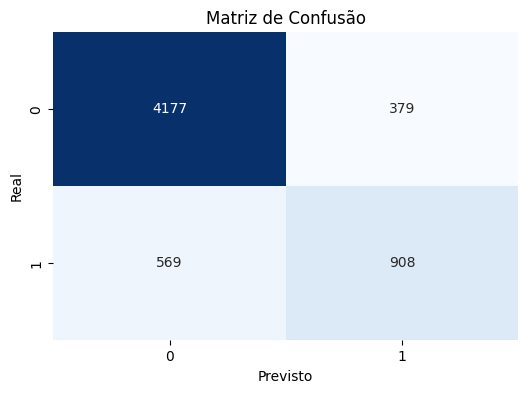

In [127]:
cm = confusion_matrix(y_test,YtestPred)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Previsto')

plt.ylabel('Real')

plt.title('Matriz de Confusão')

plt.show()


## Classification Tree

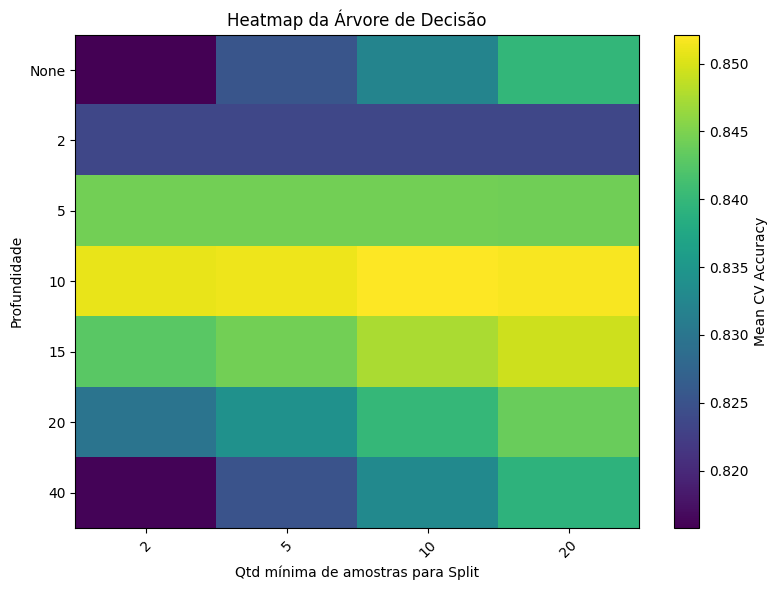

Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.8521222308351352


In [128]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV



# Definição dos Hiperparâmetros

grid = {

    "max_depth": [None, 2, 5, 10, 15, 20, 40],

    "min_samples_split": [2, 5, 10, 20],

}



# Modelo de Árvore de Decisão

DT = DecisionTreeClassifier(random_state=123)



# Busca e otimização dos hiperparâmetros

grid_search = GridSearchCV(DT, grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)

grid_search.fit(X_train, y_train)



# Vizualização dos resultados com relação à profundidade e à quantidade minima para ter um split

cv_results = pd.DataFrame(grid_search.cv_results_)



scores = cv_results.pivot(index="param_max_depth", columns="param_min_samples_split", values="mean_test_score")



plt.figure(figsize=(8, 6))

plt.imshow(scores, cmap="viridis", interpolation="nearest", aspect="auto")

plt.colorbar(label="Mean CV Accuracy")

plt.xticks(range(len(grid["min_samples_split"])), grid["min_samples_split"], rotation=45)

plt.yticks(range(len(grid["max_depth"])), ["None" if v is None else v for v in grid["max_depth"]])

plt.xlabel("Qtd mínima de amostras para Split")

plt.ylabel("Profundidade")

plt.title("Heatmap da Árvore de Decisão")

plt.tight_layout()

plt.show()



# Melhor configuração obtida

print("Best Parameters:", grid_search.best_params_)

print("Best Cross-Validation Accuracy:", grid_search.best_score_)


In [129]:
# Treinamento do modelo de Árvore de Classificação



best_params = grid_search.best_params_

CLF = DecisionTreeClassifier(**best_params)

CLF = CLF.fit(X_train, y_train)



Ypred_CLF = CLF.predict(X_test)



Ypred_CLF

array([0, 0, 0, ..., 0, 0, 1])


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4556
           1       0.77      0.57      0.66      1477

    accuracy                           0.85      6033
   macro avg       0.82      0.76      0.78      6033
weighted avg       0.85      0.85      0.85      6033



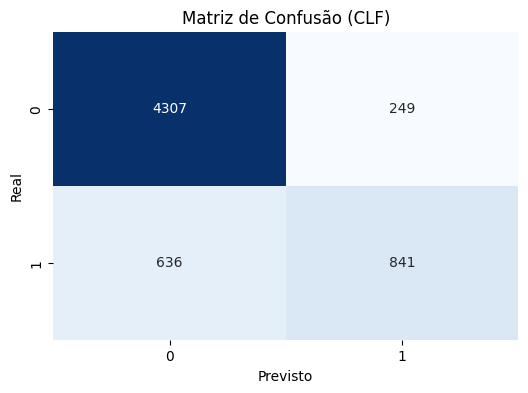

In [130]:
#Analisando as estatísticas e resultados do nosso modelo



print("\nRelatório de Classificação:")

print(classification_report(y_test, Ypred_CLF))



# Matriz de Confusão da árvore

cm = confusion_matrix(y_test,Ypred_CLF)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Previsto')

plt.ylabel('Real')

plt.title('Matriz de Confusão (CLF)')

plt.show()

## Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier


# Definição dos hiperparâmetros

param_grid = {

    "n_estimators": [50, 100, 200],  # Número de árvores

    "max_depth": [None, 10, 20, 30],  # Profundidade máxima das árvores

    "min_samples_split": [2, 5, 10],  # Número mínimo de amostras para dividir um nó

    "min_samples_leaf": [1, 2, 4],    # Número mínimo de amostras em uma folha

}



# Modelo de Floresta Aleatória

RF = RandomForestClassifier(random_state=123)



# Busca e otimização dos hiperparâmetros

grid_search_rf = GridSearchCV(RF, param_grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)

grid_search_rf.fit(X_train, y_train)



# Melhor configuração obtida

print("Melhores parâmetros:", grid_search_rf.best_params_)

print("Melhor acurácia na validação cruzada:", grid_search_rf.best_score_)


Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Melhor acurácia na validação cruzada: 0.8596652415993677


In [132]:
# Criando e Testando nosso modelo nos dados de treino



RF = RandomForestClassifier(**grid_search_rf.best_params_, random_state=123)

RF.fit(X_train, y_train)





Ypred_RF = RF.predict(X_test)



RF

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200,
                       random_state=123)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4556
           1       0.78      0.61      0.68      1477

    accuracy                           0.86      6033
   macro avg       0.83      0.78      0.80      6033
weighted avg       0.86      0.86      0.85      6033



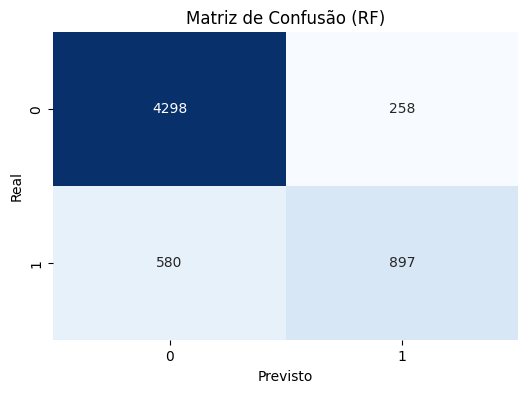

In [133]:
#Analisando as estatísticas e resultados do nosso modelo



print("\nRelatório de Classificação:")

print(classification_report(y_test, Ypred_RF))



# Matriz de Confusão da floresta aleatória

cm = confusion_matrix(y_test,Ypred_RF)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Previsto')

plt.ylabel('Real')

plt.title('Matriz de Confusão (RF)')

plt.show()

## Rede Neural

C:\Users\Luan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


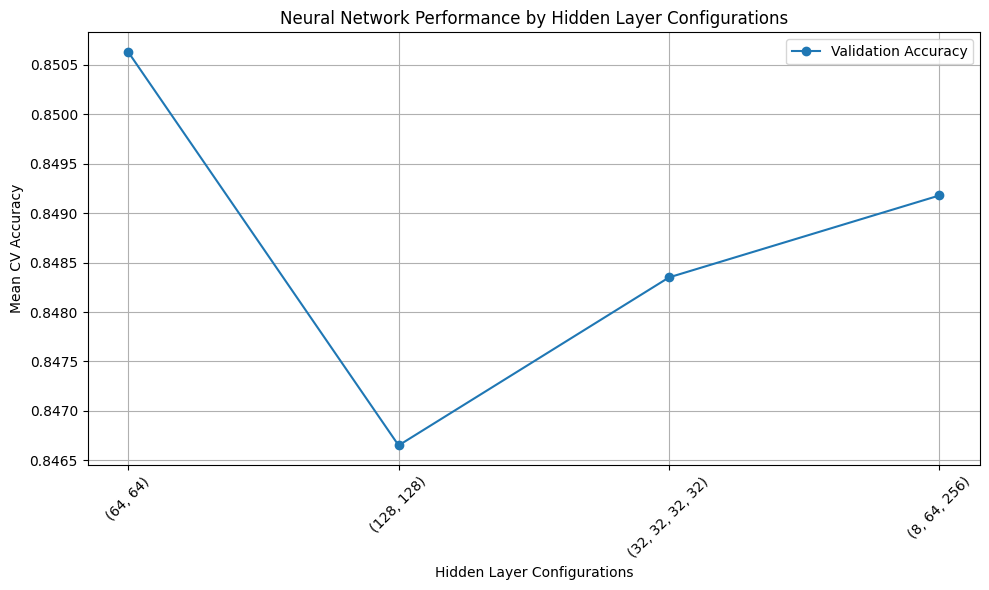

Best Parameters: {'hidden_layer_sizes': (64, 64), 'max_iter': 50, 'random_state': 123}
Best Cross-Validation Accuracy: 0.8506298997872062


In [150]:
# Treinamento do modelo de Rede Neural

from sklearn.neural_network import MLPClassifier



# Definição dos hiperparâmetros

hidden_layers = [(64,64), (128, 128), (32, 32, 32, 32), (8, 64, 256)]

epochs = [50] 

grid = {

    "hidden_layer_sizes": hidden_layers,

    "max_iter": epochs,

    "random_state": [123],

}



# Modelo de Rede Neural

ANN = MLPClassifier()



# Busca e otimização dos hiperparâmetros

grid_search = GridSearchCV(ANN, grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)

grid_search.fit(X_train, y_train)



# Vizualização dos resultados obtidos

cv_results = pd.DataFrame(grid_search.cv_results_)



plt.figure(figsize=(10, 6))

plt.plot(range(len(hidden_layers)), cv_results["mean_test_score"], marker="o", label="Validation Accuracy")

plt.xticks(range(len(hidden_layers)), [str(layers) for layers in hidden_layers], rotation=45)

plt.xlabel("Hidden Layer Configurations")

plt.ylabel("Mean CV Accuracy")

plt.title("Neural Network Performance by Hidden Layer Configurations")

plt.grid(True)

plt.legend()

plt.tight_layout()

plt.show()



# Melhor configuração obtida

print("Best Parameters:", grid_search.best_params_)

print("Best Cross-Validation Accuracy:", grid_search.best_score_)


In [135]:
# Criando e Testando nosso modelo nos dados de treino

ANN = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=10, random_state=123)

ANN.fit(X_train, y_train)

Ypred_ANN = ANN.predict(X_test)

Ypred_ANN

C:\Users\Luan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1])


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4556
           1       0.74      0.60      0.66      1477

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



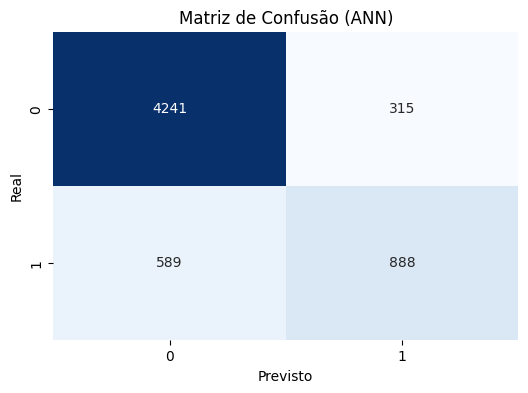

In [136]:
#Analisando as estatísticas e resultados do nosso modelo



print("\nRelatório de Classificação:")

print(classification_report(y_test, Ypred_ANN))



# Matriz de Confusão da rede neural

cm = confusion_matrix(y_test,Ypred_ANN)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Previsto')

plt.ylabel('Real')

plt.title('Matriz de Confusão (ANN)')

plt.show()

## Support Vector Machines (SVM)

In [137]:
from sklearn.svm import SVC

# Definição dos hiperparâmetros
param_grid = {
    "C": [0.1, 1, 5, 10],  # Regula a margem da nossa svm
    "kernel": ["linear", "rbf"],  # Tipos de kernels (linear e radial basis)
    "gamma": ["scale","auto"]  # Influência da amostra (serve apenas para os não lineares)
}

# Modelo de Support Vector Machine
SVM = SVC()

grid_search_svm = GridSearchCV(SVM, param_grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_search_svm.fit(X_train, y_train)

# Melhor configuração obtida
print("Melhores parâmetros:", grid_search_svm.best_params_)
print("Melhor acurácia na validação cruzada:", grid_search_svm.best_score_)


Melhores parâmetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor acurácia na validação cruzada: 0.8510031113850065


In [138]:
# Criando e Testando nosso modelo nos dados de treino

SVM = SVC(**grid_search_svm.best_params_)

SVM.fit(X_train, y_train)

Ypred_SVM = SVM.predict(X_test)

Ypred_SVM

array([0, 0, 0, ..., 0, 0, 1])

Acurácia no conjunto de teste: 0.8518150174042765
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4556
           1       0.74      0.61      0.67      1477

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



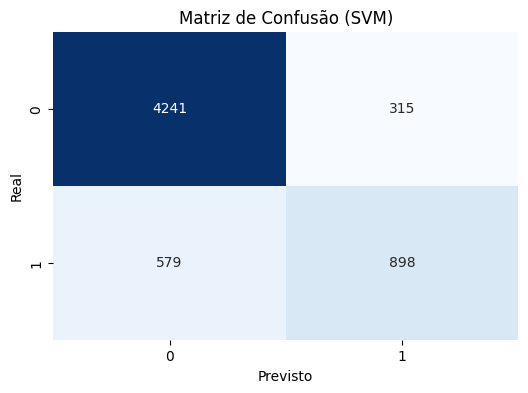

In [139]:

#Analisando as estatísticas e resultados do nosso modelo

print("Acurácia no conjunto de teste:", accuracy_score(y_test, Ypred_SVM))
print(classification_report(y_test, Ypred_SVM))

# Matriz de Confusão da SVM
cm = confusion_matrix(y_test, Ypred_SVM)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (SVM)')
plt.show()

# Comparando os classficadores

Classifier       KNN  Neural Network  Decision Tree  Random Forest       SVM
Accuracy    0.842864        0.850157       0.853307       0.861097  0.851815
Precision   0.837366        0.843804       0.846907       0.855521  0.845708
Recall      0.842864        0.850157       0.853307       0.861097  0.851815
F1-Score    0.839068        0.844685       0.845237       0.854971  0.846630


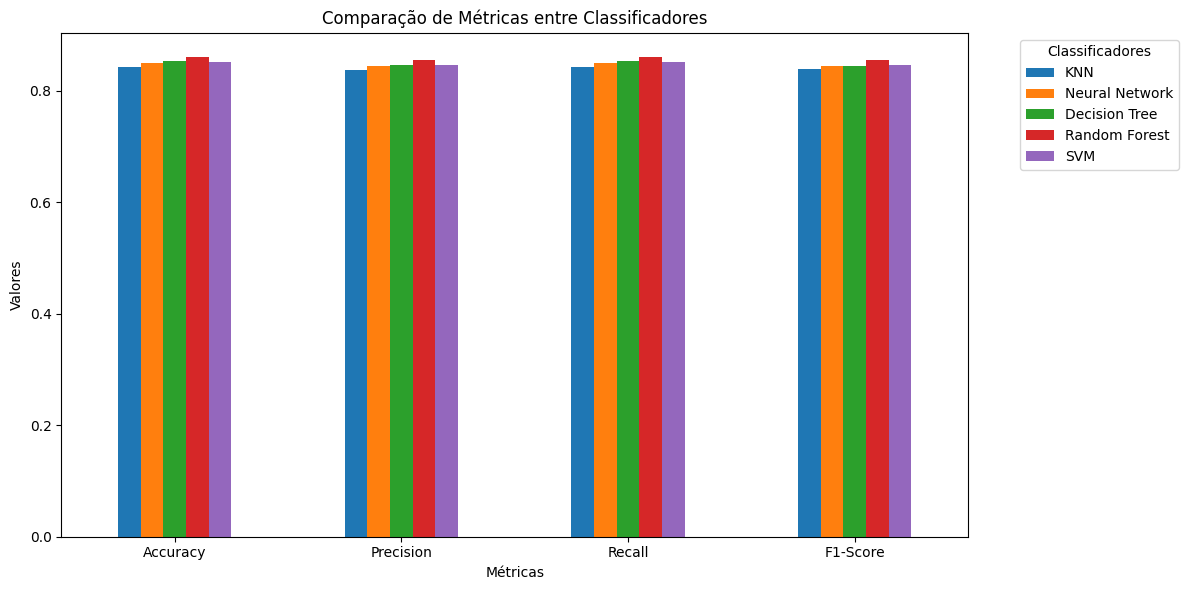

In [ ]:
# Para comparar os classificadores feitos, iremos comparar algumas das estatísticas obtidas após o treinamento,
# como acurácia, precisão, recall e f1-score, assim como as curvas-roc deles.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Lista de classificadores treinados, junto ao knn 
classifiers = {
    "KNN": knn,
    "Neural Network": ANN,
    "Decision Tree": CLF,
    "Random Forest": RF,
    "SVM": SVM,
}

# Dicionário para armazenar os resultados
results = []

# Loop para avaliar cada modelo
for name, model in classifiers.items():
    Y_pred = model.predict(X_test)

    # Avaliar métricas
    acc = accuracy_score(y_test, Y_pred)
    precision = precision_score(y_test, Y_pred, average="weighted")
    recall = recall_score(y_test, Y_pred, average="weighted")
    f1 = f1_score(y_test, Y_pred, average="weighted")
    
    # Adicionar resultados ao dicionário
    results.append({
        "Classifier": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    })

# Converter os resultados para um DataFrame
results_df = pd.DataFrame(results)
metrics_df = results_df.set_index("Classifier").T
print(metrics_df)

# Plotar a comporação das métricas dos nossos classificadores
metrics_df.plot(kind="bar", figsize=(12, 6), rot=0)
plt.title("Comparação de Métricas entre Classificadores")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.legend(title="Classificadores", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


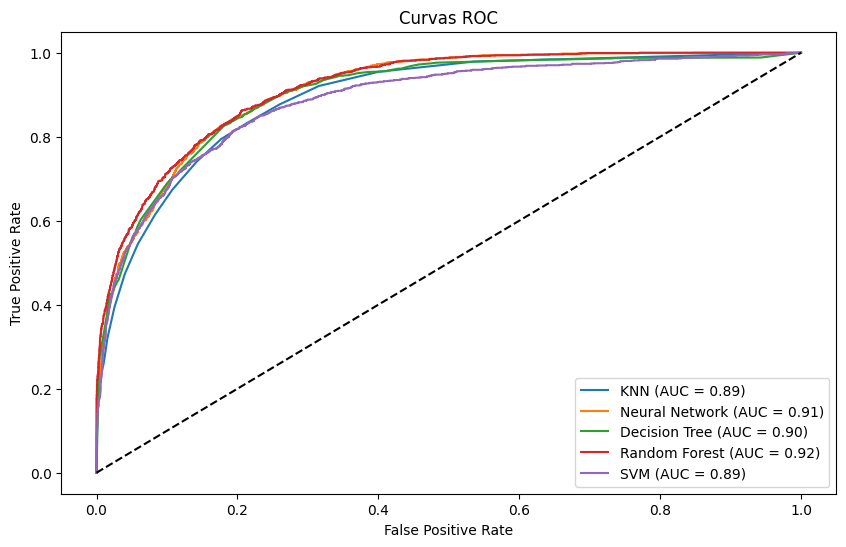

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
for name, model in classifiers.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC dos classificadores")
plt.legend()
plt.show()

# Conclusão

Com base nos resultados obtidos, o modelo que apresentou o melhor desempenho geral nos dados de treino foi o Random Forest. Este resultado era esperado dado a complexidade do modelo, que proporciona maior capacidade de generalização dos dados devido à junção de múltiplas árvores de classificação, evitando overfitting.

Por outro lado, o K-Nearest Neighbors (KNN) foi o modelo com o pior desempenho. Apesar de termos utilizado o KNN como base para a análise exploratória inicial da base, seu desempenho limitado pode ser explicado pela sua simplicidade em comparação com os outros modelos. O KNN é sensível à escala dos dados e sofre mais com a dimensionalidade e outliers, fatores presentes na base Adult.

Após o Random Forest, os modelos que apresentaram os melhores resultados foram, em ordem:

Rede Neural: Demonstrou bons resultados, especialmente devido à capacidade de capturar padrões complexos nos dados. No entanto, requer maior cuidado com o ajuste de hiperparâmetros e treinamento mais demorado.
Árvore de Decisão: Apesar de ser simples, teve um desempenho aceitável, mas foi superada pelo Random Forest, que combina várias árvores para melhorar a estabilidade e a precisão.
SVM: Obteve resultados sólidos, mas ficou atrás dos modelos mais robustos devido à sua sensibilidade a dados desbalanceados.



# Gerando dados de saída

In [ ]:
# Normalização dos nossos dados de teste já com as variáveis categóricas codificadas

adult_test_encoded[colunas_numericas] = scaler.transform(adult_test_encoded[colunas_numericas])


adult_test_encoded

,age,workclass,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,-1.023185,1,1.127842,0,1,-0.148500,-0.218601,0.256569,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.946312,1,1.127842,1,1,-0.148500,-0.218601,0.339931,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.566339,1,1.520022,0,0,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.499634,1,-0.440877,0,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.946312,1,1.127842,1,1,-0.148500,-0.218601,0.756738,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0.118929,1,-0.440877,1,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,0,0,0,0,0,0,0
16276,-0.642480,1,-0.440877,1,1,-0.148500,-0.218601,-0.076876,0,0,...,0,0,0,1,0,0,0,0,0,0
16277,-1.023185,1,-0.440877,0,1,-0.148500,-0.218601,-0.076876,0,1,...,0,0,0,0,0,0,0,0,0,0
16278,1.641748,1,1.520022,0,0,0.295572,-0.218601,-0.493683,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Como vimos, nossa floresta aleatória foi a que gerou melhores resultados, e portanto
# iremos usá-la como modelo final para a classifcação

rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=123)



rf.fit(X, Y)



output = rf.predict(adult_test_encoded)

In [ ]:
# Dados de saída com as previsões finais

saida = pd.DataFrame(({'Id':id_list, 'income':output}))

saida['income'] = saida['income'].apply(lambda x: '<=50K' if x==0 else '>50K')

saida

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,<=50K
16278,16278,<=50K


In [ ]:
# Gerando o arquivo de saída

saida.to_csv('submission.csv', index = False)